**HACKATON FINAL DIPLOMATURA EN CIENCIA DE DATOS**

Integrantes del equipo:

*   Candela Branca
*   Marco Bertone
*   Augusto Villa Abrille
*  Martina Roasenda

**Base de datos a trabajar**: Se va a llevar a cabo un analisis sobre un data frame con informacion obtenida de datos oficiales del gobierno, el mismo contiene datos historicos de cultivos en Argentina



**Descripcion de las variables:**

* Id_ provincia: Asigna a cada provincia un valor numérico que la represente

* Provincia: Representa todas las provincias que se te tuvieron en cuenta para llevar a cabo el análisis

* Id_ departamento:Asigna a cada departamento un valor numérico que la represente
* Departamento:Representa los departamentos analizados de cada provincia en cuestion
* Id_ cultivo: Asigna a cada tipo de cultivo un valor numérico que lo represente
* Cultivo:Representa las variedades de cultivos realizadas en los distintos años durante las campañas realizadas.
* Id_ Campaña: Asigna a cada tipo de campaña un valor numérico que la represente
* Campaña: Representa los distintos años tomados en cuenta en los cuales se tomaron datos sobre los cultivos
* Sup_sembrada: Representa la superficie de  hectáreas sembradas en cada region
* Sup_ cosechada: Representa la superficie de hectáreas que efectivamente fueron cosechadas en cada región
* Producción :Representa las toneladas cosechadas de cada producto en cada campaña
* Rendimiento: Representa el rendimiento en kilogramos obtenido de la cosecha

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
import numpy as np

In [ ]:
# Cargan del dataset desde un archivo CSV
from google.colab import files
uploaded = files.upload()

Saving estima_agri.csv to estima_agri.csv


In [ ]:
# Leyendo el dataset en un DataFrame de Pandas
df_estima = pd.read_csv('estima_agri.csv', encoding='latin1')

<ipython-input-3-6bc44892ce67>:2: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estima = pd.read_csv('estima_agri.csv', encoding='latin1')


In [ ]:
df_estima. head(10)

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1.0,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,14,Adolfo Gonzales Chaves,1.0,Ajo,1,1969/1970,15,15,82,5467
2,6,Buenos Aires,21,Alberti,1.0,Ajo,1,1969/1970,5,5,7,1400
3,6,Buenos Aires,28,Almirante Brown,1.0,Ajo,1,1969/1970,2,2,8,4000
4,6,Buenos Aires,77,Arrecifes,1.0,Ajo,1,1969/1970,6,6,15,2500
5,6,Buenos Aires,42,Ayacucho,1.0,Ajo,1,1969/1970,5,5,14,2800
6,6,Buenos Aires,56,Bahia Blanca,1.0,Ajo,1,1969/1970,10,10,40,4000
7,6,Buenos Aires,63,Balcarce,1.0,Ajo,1,1969/1970,450,450,2025,4500
8,6,Buenos Aires,70,Baradero,1.0,Ajo,1,1969/1970,5,5,20,4000
9,6,Buenos Aires,84,Benito Juarez,1.0,Ajo,1,1969/1970,5,5,22,4400


In [ ]:
df_estima['rendimiento'] = pd.to_numeric(df_estima['rendimiento'], errors='coerce')
df_estima['produccion '] = pd.to_numeric(df_estima['produccion '], errors='coerce')
df_estima['sup_cosechada'] = pd.to_numeric(df_estima['sup_cosechada'], errors='coerce')
df_estima['sup_sembrada'] = pd.to_numeric(df_estima['sup_sembrada'], errors='coerce')

In [ ]:
df_estima[['sup_sembrada',	'sup_cosechada',	'produccion ',	'rendimiento']] .describe().T

,count,mean,std,min,25%,50%,75%,max
sup_sembrada,153889.0,12285.602883,35850.138504,0.0,180.0,1439.0,8500.0,1096100.0
sup_cosechada,153876.0,10753.621162,34366.863508,0.0,61.0,800.0,6000.0,1066100.0
produccion,153875.0,33319.730359,127620.924738,0.0,180.0,1790.0,14000.0,8620000.0
rendimiento,153875.0,3489.310772,5577.586344,0.0,1000.0,1919.0,3501.0,300000.0


cultivo
Maíz                17115
Trigo total         12770
Sorgo               11633
Soja total          11391
Avena               11117
Girasol             10234
Cebada forrajera     6572
Soja 1ra             5908
Centeno              5802
Papa total           5628
Name: count, dtype: int64


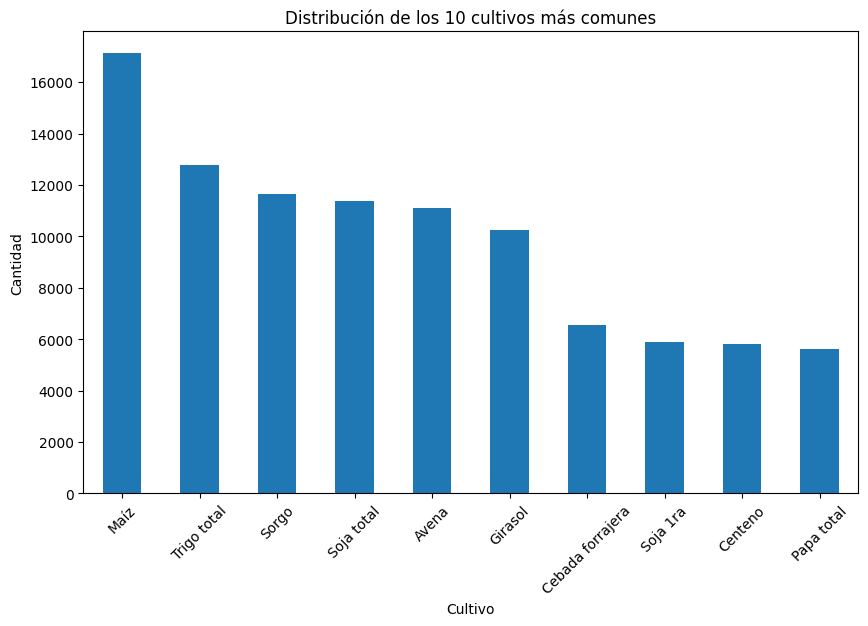

In [ ]:
# Calcular la distribución de cultivos
distribucion_cultivos = df_estima['cultivo'].value_counts()

# Mostrar los 10 cultivos más comunes
print(distribucion_cultivos.head(10))

# Visualizar la distribución de cultivos
plt.figure(figsize=(10, 6))
distribucion_cultivos.head(10).plot(kind='bar')
plt.title('Distribución de los 10 cultivos más comunes')
plt.xlabel('Cultivo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

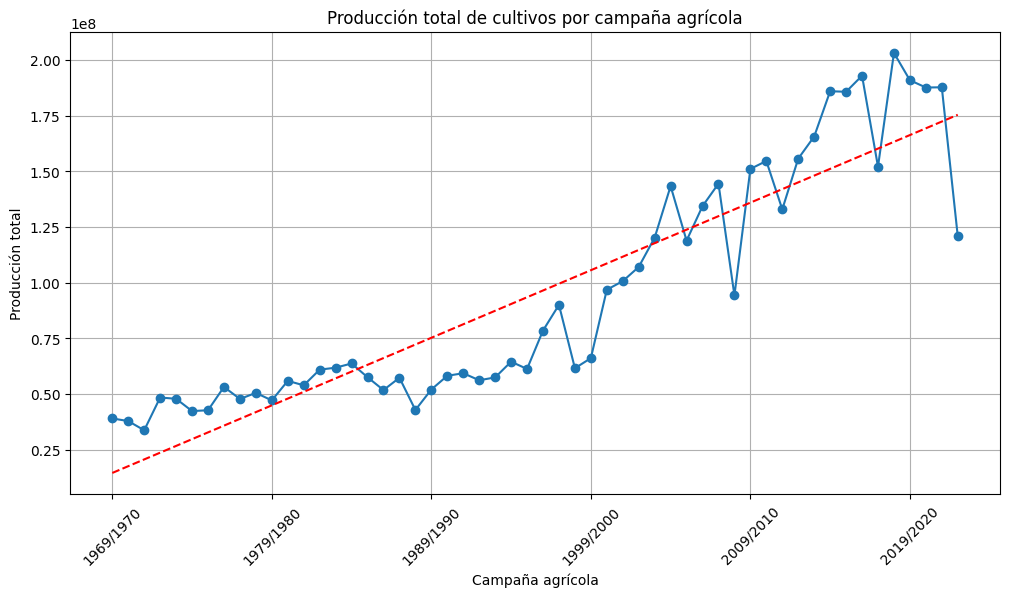

In [ ]:
# Calcular la producción total por campaña agrícola
produccion_total_por_campaña = df_estima.groupby('campaña')['produccion '].sum()

# Seleccionar cada décima campaña para mostrar en el eje x
campañas_seleccionadas = produccion_total_por_campaña.index[::10]

# Ajustar una línea de regresión lineal
x_values = np.arange(len(produccion_total_por_campaña))  # Valores x
y_values = produccion_total_por_campaña.values            # Valores y
coefficients = np.polyfit(x_values, y_values, 1)         # Ajuste de la línea de regresión
poly_function = np.poly1d(coefficients)                  # Función polinómica

# Visualizar la tendencia temporal de la producción total
plt.figure(figsize=(12, 6))
plt.plot(produccion_total_por_campaña.index, produccion_total_por_campaña.values, marker='o', linestyle='-')
plt.plot(x_values, poly_function(x_values), linestyle='--', color='red', label='Ajuste lineal')  # Graficar la línea de regresión
plt.title('Producción total de cultivos por campaña agrícola')
plt.xlabel('Campaña agrícola')
plt.ylabel('Producción total')
plt.xticks(campañas_seleccionadas, rotation=45)  # Establecer las etiquetas del eje x como las campañas seleccionadas
plt.grid(True)
plt.show()



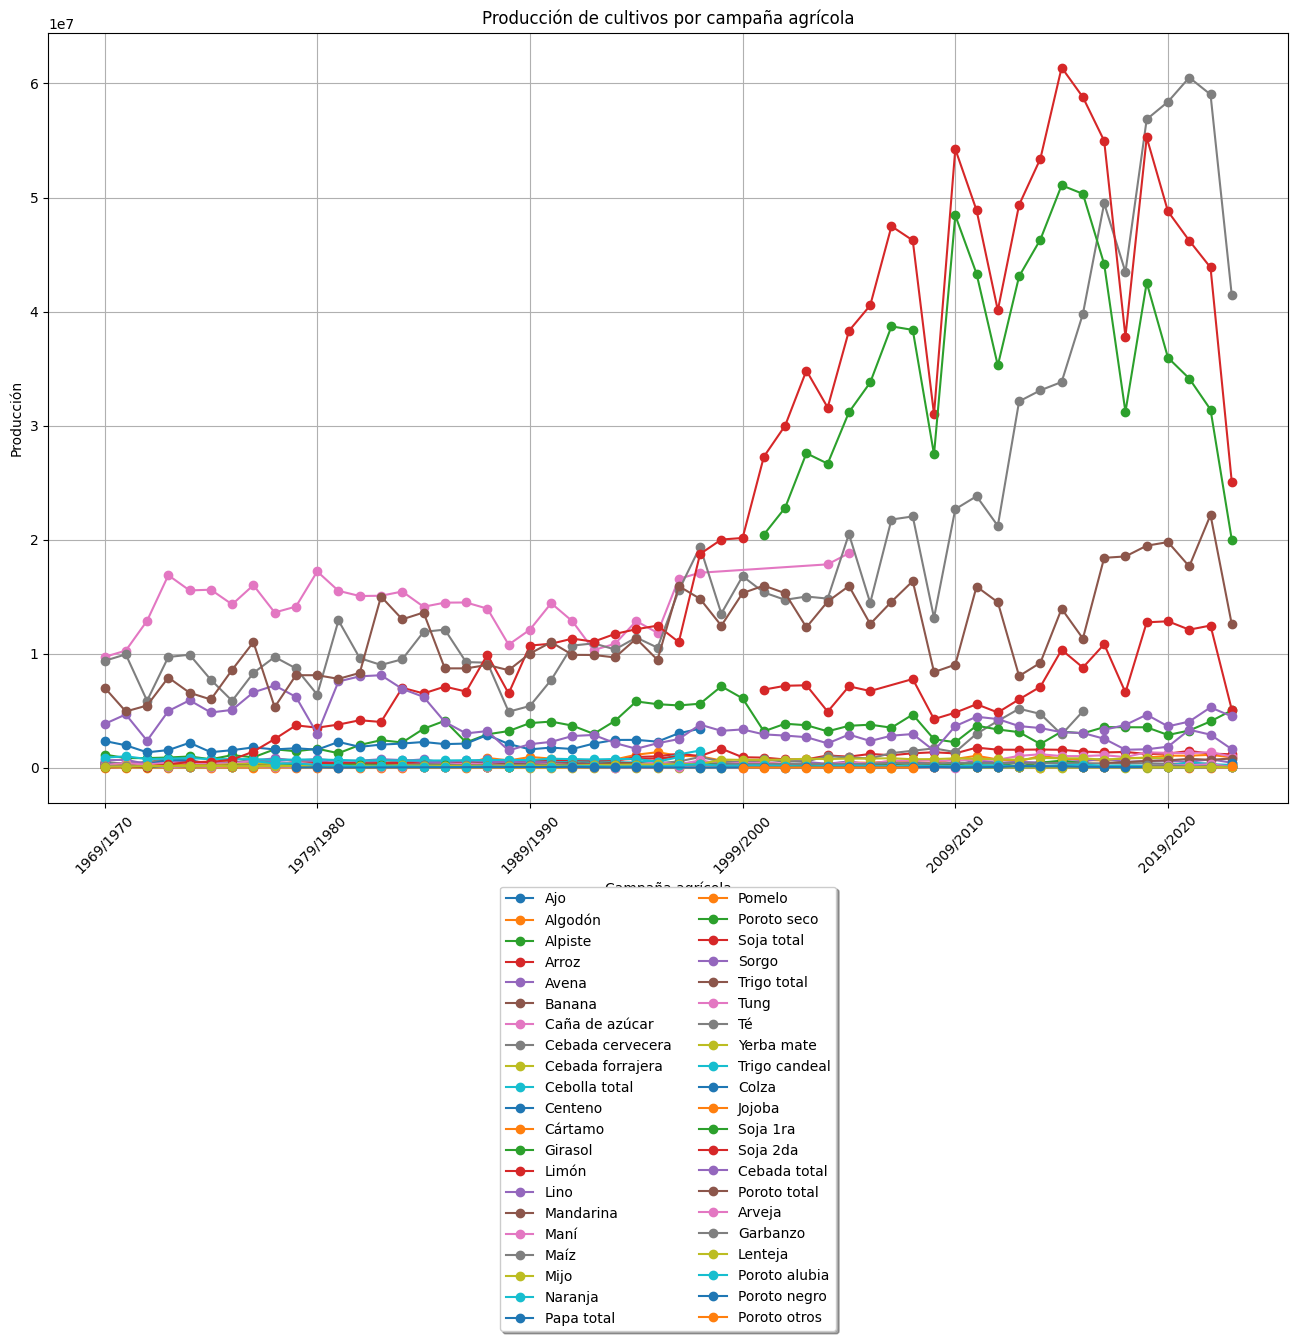

In [ ]:
# Agrupar por campaña y cultivo y calcular la producción total
produccion_por_campaña = df_estima.groupby(['campaña', 'cultivo'])['produccion '].sum().reset_index()

# Seleccionar cada décima campaña para mostrar en el eje x
campañas_seleccionadas = produccion_por_campaña['campaña'].unique()[::10]

# Ajustar el tamaño de la figura para hacerla más larga
plt.figure(figsize=(16, 10))

# Visualizar la producción de los cultivos a lo largo de las campañas agrícolas
for cultivo in produccion_por_campaña['cultivo'].unique():
    datos_cultivo = produccion_por_campaña[produccion_por_campaña['cultivo'] == cultivo]
    plt.plot(datos_cultivo['campaña'], datos_cultivo['produccion '], marker='o', linestyle='-', label=cultivo)

plt.title('Producción de cultivos por campaña agrícola')
plt.xlabel('Campaña agrícola')
plt.ylabel('Producción')
plt.xticks(campañas_seleccionadas, rotation=45)  # Establecer las etiquetas del eje x como las campañas seleccionadas

# Crear una sola leyenda para todos los cultivos y ubicarla fuera del gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)

plt.grid(True)
plt.show()

<ipython-input-14-01e4492d7709>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_estima, x='cultivo', y='rendimiento', palette='viridis')


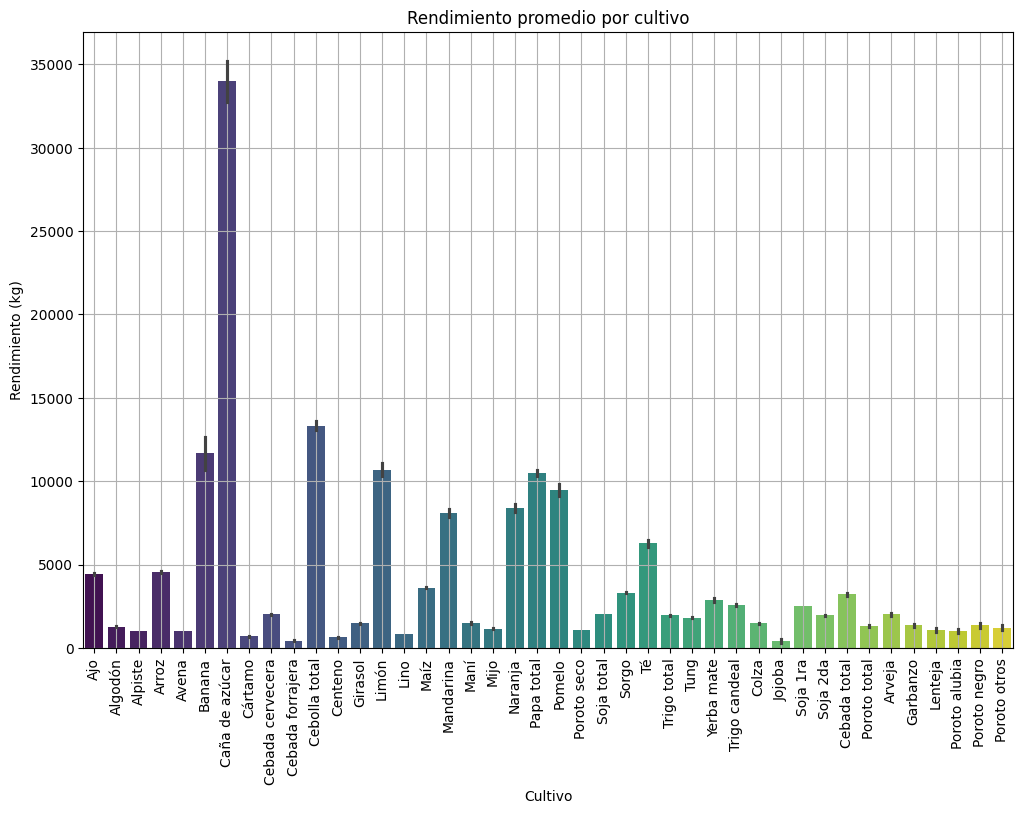

In [ ]:

#Calculo del rendimiento promedio por cultivo por kg
# Agrupar rendimiento por cultivo
rendimiento_por_cultivo = df_estima.groupby('cultivo')['rendimiento'].mean().reset_index()

# Visualizar rendimiento por cultivo
plt.figure(figsize=(12, 8))
sns.barplot(data=df_estima, x='cultivo', y='rendimiento', palette='viridis')
plt.title('Rendimiento promedio por cultivo')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento (kg)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# Agrupar por provincia y cultivo y calcular la producción máxima
produccion_maxima_por_provincia = df_estima.groupby(['provincia', 'cultivo'])['produccion '].max()

# Encontrar el cultivo con mayor producción en cada provincia
cultivo_maximo_por_provincia = produccion_maxima_por_provincia.groupby('provincia').idxmax().apply(lambda x: x[1])


# Agrupar por provincia y cultivo y calcular la producción mínima
produccion_minima_por_provincia = df_estima.groupby(['provincia', 'cultivo'])['produccion '].min()

# Encontrar el cultivo con menor producción en cada provincia
cultivo_minimo_por_provincia = produccion_minima_por_provincia.groupby('provincia').idxmin().apply(lambda x: x[1])


# Combinar las dos series en un DataFrame
df_max_min_por_provincia = pd.concat([cultivo_maximo_por_provincia, cultivo_minimo_por_provincia], axis=1)
df_max_min_por_provincia.columns = ['Cultivo con mayor producción', 'Cultivo con menor producción']

# Mostrar el DataFrame
print(df_max_min_por_provincia)

                    Cultivo con mayor producción Cultivo con menor producción
provincia                                                                    
Buenos Aires                          Soja total                          Ajo
Catamarca                             Soja total                      Algodón
Chaco                                       Maíz                          Ajo
Chubut                                Papa total                      Alpiste
Cordoba                                     Maíz                      Algodón
Corrientes                                 Arroz                          Ajo
Entre Rios                            Soja total                      Algodón
Formosa                                     Maíz                        Avena
Jujuy                             Caña de azúcar                        Avena
La Pampa                                    Maíz                      Alpiste
La Rioja                                 Algodón                

In [ ]:
## Intento de prueba de hipotesis
from scipy.stats import ttest_ind

# Filtrar el DataFrame para obtener los datos de rendimiento del cultivo X en la campaña 1 y la campaña 2
rendimiento_campaña1 = df_estima[(df_estima['cultivo'] == 'Cultivo X') & (df_estima['campaña'] == 'Campaña 1')]['rendimiento']
rendimiento_campaña2 = df_estima[(df_estima['cultivo'] == 'Cultivo X') & (df_estima['campaña'] == 'Campaña 2')]['rendimiento']

# Realizar la prueba t para muestras independientes
t_statistic, p_value = ttest_ind(rendimiento_campaña1, rendimiento_campaña2)

# Imprimir el resultado de la prueba
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

# Interpretar el resultado
if p_value < 0.05:
    print("Hay una diferencia significativa en el rendimiento promedio del cultivo X entre las dos campañas.")
else:
    print("No hay suficiente evidencia para concluir que hay una diferencia significativa en el rendimiento promedio del cultivo X entre las dos campañas.")

Estadístico t: nan
Valor p: nan
No hay suficiente evidencia para concluir que hay una diferencia significativa en el rendimiento promedio del cultivo X entre las dos campañas.


In [ ]:
df_estima = df_estima[df_estima['sup_sembrada'] != 'SD']
df_estima = df_estima[df_estima['sup_cosechada'] != 'SD']
df_estima = df_estima[df_estima['produccion '] != 'SD']
df_estima = df_estima[df_estima['rendimiento'] != 'SD']

In [ ]:
correlation = df_estima[['sup_sembrada',	'sup_cosechada',	'produccion ',	'rendimiento']].corr()
correlation

,sup_sembrada,sup_cosechada,produccion,rendimiento
sup_sembrada,1.000000,0.985310,0.791189,-0.030040
sup_cosechada,0.985310,1.000000,0.799283,-0.022346
produccion,0.791189,0.799283,1.000000,0.232076
rendimiento,-0.030040,-0.022346,0.232076,1.000000


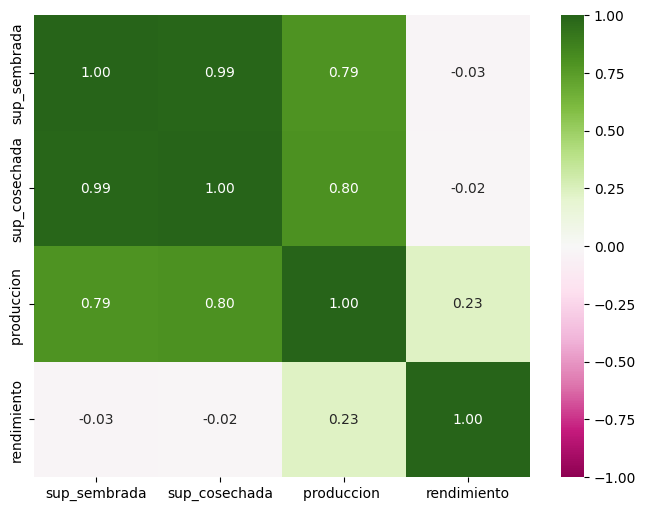

In [ ]:
# Visualizacion alternativa de la correlacion como heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='PiYG')
plt.show() # Hay varias correlaciones fuertes, tanto positivas como negativas

In [ ]:
y = df_estima['sup_sembrada']
x = df_estima['produccion ']

In [ ]:
df_estima['sup_sembrada'].fillna(0, inplace=True)
df_estima['sup_cosechada'].fillna(0, inplace=True)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
df_estima['sup_sembrada'].fillna(0, inplace=True)
df_estima['produccion '].fillna(0, inplace=True)
# Crear y entrenar el modelo de regresión
X = df_estima[['sup_sembrada']]  # Características (superficie sembrada)
y = df_estima['produccion ']  # Etiqueta (produccion)

model = LinearRegression()
model.fit(X, y)

# Hacer predicciones
prediccion = model.predict(X)

# Mostrar los coeficientes del modelo
print('Coeficiente de la regresión:', model.coef_)
print('Intercepción de la regresión:', model.intercept_)
#Este código crea un modelo de regresión lineal simple utilizando scikit-learn,
# y lo entrena con los datos de superficie sembrada y producción.
#Luego, hace una predicción de producción basada en la superficie sembrada y
#muestra los coeficientes de la regresión.




Coeficiente de la regresión: [2.81639618]
Intercepción de la regresión: -1284.4259027553708


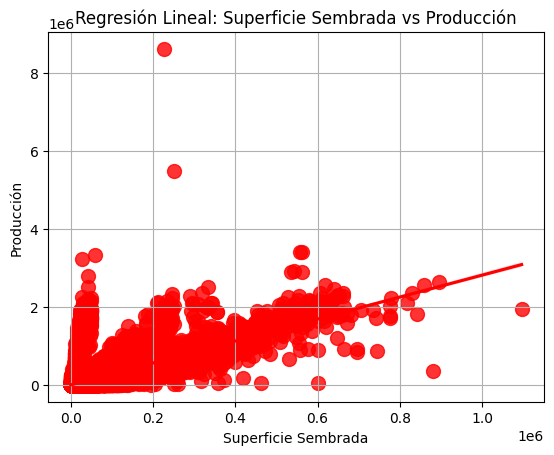

In [ ]:
import seaborn as sns

# Graficar los datos originales con la línea de regresión
sns.regplot(x='sup_sembrada', y='produccion ', data=df_estima, color='red', scatter_kws={'s': 100})
plt.xlabel('Superficie Sembrada')
plt.ylabel('Producción')
plt.title('Regresión Lineal: Superficie Sembrada vs Producción')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


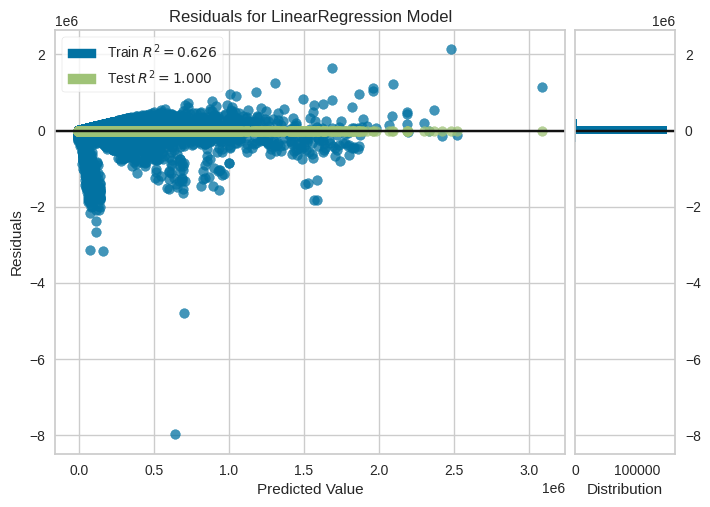

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Crear y ajustar el visualizador de residuos
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)  # Ajustar los datos al visualizador
visualizer.score(X, prediccion)  # Evaluar el modelo con los datos ajustados
visualizer.show()  # Finalizar y mostrar la figura
#para visualizar los errores residuales del modelo. El método fit ajustará los datos al visualizador, mientras que score evaluará el modelo con los datos ajustados. Finalmente, show mostrará la figura con la distribución de los errores residuales.